In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Loading the datasets
##### bechdel, movies_metadata and links

In [2]:
bechdeldf = pd.read_csv('csvdata/bechdel/movies.csv')

In [3]:
movies_metadatadf = pd.read_csv('csvdata/tmdb/movies_metadata.csv')

C:\Users\MAHE\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
creditsdf = pd.read_csv('csvdata/tmdb/credits.csv')

In [5]:
linksdf = pd.read_csv('csvdata/tmdb/links.csv')

In [6]:
bechdeldf.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0


In [7]:
creditsdf.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [8]:
linksdf.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:
linksdf["imdbnew"]=linksdf["imdbId"].astype(int)
#linksdf.head()

In [30]:
bechdeldf["imdbtemp"]=bechdeldf["imdb"].str.slice(2) #slicing the id to remove tt and making it a separate column called imdbtemp

In [32]:
bechdeldf["imdbasint"]=bechdeldf["imdbtemp"].astype(int) #converting the new column to integer

In [33]:
bechdeldf.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,imdbtemp,imdbasint
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1711425,1711425
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1343727,1343727
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,2024544,2024544
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1272878,1272878
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,0453562,453562


In [34]:
bechdeldf.rename(columns={'imdbnew':'imdbfin'},inplace=True)
linksdf.rename(columns={'imdbnew':'imdbfin'},inplace=True)

In [36]:
#bechdeldf.drop("period code", axis = 1,inplace=True)

In [38]:
#bechdeldf.drop("decade code", axis = 1, inplace=True)
#removing the columns we don't need

In [17]:
#bechdeldf.head()

In [26]:
linksdf.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
imdbfin      int32
dtype: object

In [39]:
bechdeldf.dtypes

year                int64
imdb               object
title              object
test               object
clean_test         object
binary             object
budget              int64
domgross          float64
intgross          float64
code               object
budget_2013$        int64
domgross_2013$    float64
intgross_2013$    float64
imdbtemp           object
imdbasint           int32
dtype: object

In [40]:
bechdel_links = pd.merge(bechdeldf, linksdf, left_on='imdbasint',right_on='imdbfin', how='left') #joined the two datasets

In [41]:
bechdel_links.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,imdbtemp,imdbasint,movieId,imdbId,tmdbId,imdbfin
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1711425,1711425,100507.0,1711425.0,107811.0,1711425.0
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1343727,1343727,96737.0,1343727.0,49049.0,1343727.0
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,2024544,2024544,105844.0,2024544.0,76203.0,2024544.0
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1272878,1272878,103883.0,1272878.0,136400.0,1272878.0
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,0453562,453562,101895.0,453562.0,109410.0,453562.0


In [58]:
passcounts=bechdel_links.binary.value_counts()["PASS"]
failcounts=bechdel_links.binary.value_counts()["FAIL"]

In [75]:
count_series = bechdel_links.groupby(['binary', 'year']).size()
count_series
#this data needs to be plotted

binary  year
FAIL    1971     5
        1972     2
        1973     4
        1974     5
        1975     5
                ..
PASS    2009    42
        2010    61
        2011    53
        2012    37
        2013    46
Length: 85, dtype: int64

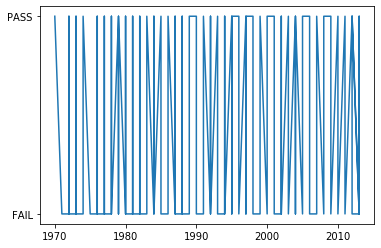

In [80]:
#plotting a time series graph to show how many movies in a year passed the test and how many didn't, 
#hypothesis:more movies have passed bechdel test over the years
x=bechdel_links["year"]
y=bechdel_links["binary"]
plt.plot(x,y)
#this plot is wrong it needs to be changed